<a href="https://colab.research.google.com/github/hyyy11/colab0000/blob/main/15%EC%9D%BC%EC%B0%A8_0401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

#Google 드라이브상의 텍스트 데이터로의 경로를 지정하세요
nov_path = '/content/drive/MyDrive/' + 'Colab Notebooks Source Code_샘플데이터/Chapter8/novels/은하철도의 밤.txt'

#파일을 읽어 들인다
with open(nov_path, 'r') as f:
    nov_text = f.read()
    print(nov_text[:500])    #첫 500문자만 표시시

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
"그럼, 여러분은 이렇게 강이라고 하거나 우유가 흐른 흔적이라고 말하고 있는 이 희미하고 하얀 것이 실제로는 무엇인지 알고 있습니까?" 선생님은 칠판에 걸어 놓은 커다란 검은 별자리 지도의 위에서 아래쪽으로 희뿌연 띠 모양을 한 은하를 가리키며 모두에게 질문을 던졌습니다.
캄파넬라가 손을 들었습니다. 그리고 나서 네다섯 명이 손을 더 들었습니다. 조바니도 손을 들려고 하다가 황급히 그대로 멈추었습니다. 분명 그것이 모두 별이라고 언젠가 잡지에서 읽었지만, 요즘은 조바니는 교실에서도 졸고, 책을 읽을 틈도 읽을 책도 없기 때문에 왠지 아는 게 아무것도 없는 듯한 기분이 들었습니다.
그런데 선생님은 벌써 그것을 눈치챘습니다.
"조바니, 너는 알고 있겠지?"
조바니는 기세 좋게 일어났지만 막상 일어나보니 분명하게 대답할 수가 없었습니다. 자네리가 앞자리에서 뒤돌아보고 조바니를 보고 키득키득 웃었습니다. 조바니는 더 당황해서 얼굴이 새빨개졌습니다. 선생님이 또 말했습니다.
"큰 망원경으로 


In [3]:
import re #정규표현에 필요한 라이브러리

text = re.sub("[|  ]", "", nov_text)      #|과 공백의 삭제
print("문자 수", len(text))     #len()으로 문자열의 문자 수도 취득 가능

문자 수 1721


In [4]:
n_rnn = 10     #시계열의 수
batch_size = 128
epochs = 60
n_mid = 128   #중간층의 뉴런 수수

In [5]:
import numpy as np

# 인덱스와 문자로 사전을 작성
chars = sorted(list(set(text)))  # set으로 문자의 중복을 없애고, 각 문자를 리스트에 저장한다
print("문자 수(중복 없음)", len(chars))
char_indices = {}  # 문자가 키로 인덱스가 값
for i, char in enumerate(chars):
    char_indices[char] = i
indices_char = {}  # 인덱스가 키로 문자가 값
for i, char in enumerate(chars):
    indices_char[i] = char

# 시계열로 늘어선 문자와 그 다음에 예측해야 할 문자를 꺼낸다
time_chars = []  # 시계열에 늘어선 문자
next_chars = []  # 예측해야 할 문자
for i in range(0, len(text) - n_rnn):
    time_chars.append(text[i: i + n_rnn])
    next_chars.append(text[i + n_rnn])

# 입력과 정답을 one-hot 표현으로 나타냅니다
x = np.zeros((len(time_chars), n_rnn, len(chars)), dtype=np.bool_)  # 입력
t = np.zeros((len(time_chars), len(chars)), dtype=np.bool_)  # 정답
for i, t_cs in enumerate(time_chars):
    t[i, char_indices[next_chars[i]]] = 1  # 정답을 one-hot 표현으로 나타낸다
    for j, char in enumerate(t_cs):
        x[i, j, char_indices[char]] = 1  # 입력을 one-hot 표현으로 나타낸다
        
print("x의 형태", x.shape)
print("t의 형태", t.shape)

문자 수(중복 없음) 301
x의 형태 (1711, 10, 301)
t의 형태 (1711, 301)


In [6]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, SimpleRNN, LSTM, GRU

#일반적인 RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(n_mid, input_shape=(n_rnn, len(chars))))
model_rnn.add(Dense(len(chars), activation="softmax"))
model_rnn.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_rnn.summary())

print()

#LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn, len(chars))))
model_lstm.add(Dense(len(chars), activation="softmax"))
model_lstm.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_lstm.summary())

print()

#GRU
model_gru = Sequential()
model_gru.add(GRU(n_mid, input_shape=(n_rnn, len(chars))))
model_gru.add(Dense(len(chars), activation="softmax"))
model_gru.compile(loss='categorical_crossentropy', optimizer="adam")
print(model_gru.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               55040     
_________________________________________________________________
dense (Dense)                (None, 301)               38829     
Total params: 93,869
Trainable params: 93,869
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               220160    
_________________________________________________________________
dense_1 (Dense)              (None, 301)               38829     
Total params: 258,989
Trainable params: 258,989
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequ

In [7]:
from tensorflow.python.keras.callbacks import LambdaCallback
 
def on_epoch_end(epoch, logs):
    print("에포크: ", epoch)

    beta = 5  # 확률 분포를 조정하는 상수
    prev_text = text[0:n_rnn]  # 입력에 사용하는 문자
    created_text = prev_text  # 생성되는 텍스트
    
    print("시드: ", created_text)

    for i in range(400):  # 400 문자를 생성한다
        # 입력을 one-hot 표현으로
        x_pred = np.zeros((1, n_rnn, len(chars)))
        for j, char in enumerate(prev_text):
            x_pred[0, j, char_indices[char]] = 1
        
        # 예측을 실시, 다음 문자를 얻는다
        y = model.predict(x_pred)
        p_power = y[0] ** beta  # 확률 분포의 조정
        next_index = np.random.choice(len(p_power), p=p_power/np.sum(p_power))        
        next_char = indices_char[next_index]

        created_text += next_char
        prev_text = prev_text[1:] + next_char

    print(created_text)
    print()

# 에포크 종료 후에 실행할 함수를 설정
epock_end_callback= LambdaCallback(on_epoch_end=on_epoch_end)

In [10]:
# 일반적인 RNN
model = model_rnn
history_rnn = model_rnn.fit(x, t,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks=[epock_end_callback])

Epoch 1/60
14/14 [==============================] - 0s 9ms/step - loss: 4.6516
에포크:  0
시드:  "그럼,여러분은이렇
"그럼,여러분은이렇게하이이이이다.는니다이이이는다하이은고이이다니다이이다니이하이은다이가다니다다는다니다.이.다이이다.다.다하다이이이이고하다.다.이니다다이다하다.가는하이이다이다다다이이이이다이다.다.이이이다이다.다.다이이다하다하다.다이이다하지이다이이다는다니다.이.니다하다은고이고이이지이이이이다다이이다이이은다다하다니다.이이니이하이하다이이다다다하다이이이이다이는가이.다이이다니다.다은이이이다.다하다하이이이고이다니다.이은고이이다.다이이이이이이다이다.이이.이이다이다이다니다.이다니다.다하다이이이하다라고하이이니다이이이이이이다이다이다가다이다다이이니다하다.다이이이는다하다.는이는다다이가고이이이다이고니다.이다다다이이은다하다다이이이이이다이다이가이다다하다하다이다이다이니이이이이다이다.다다이이는지이다하다고하이다이이을니다.다이고고하을하다.이.이이이은하다이다다이에는이

Epoch 2/60
14/14 [==============================] - 0s 11ms/step - loss: 4.4984
에포크:  1
시드:  "그럼,여러분은이렇
"그럼,여러분은이렇이하이이는이는이다.이이하파이다이다.이는이이라다.다이이이이는다이이이이이이는하다이는이가이이는하이이다.이이이다고가은다이니이는다다이이이이이고이이이이이이하이다이이이이이하다이다이이이이이이고는다이다.게이는이이다니다이이하고이이다하다이는이이이하고하다하다이이는에이하고이이이고이이는다이이는이이이는하이이이이이이이다하이는이이이이는다이이다이다이다이다이
은하은하다이이이이이이이이고이다이다이이이는이이다하다이고이이이하이이이이이이는는이이는
하이하는이이이고하이는라이이는는다이다.이이는이하고하다이이이이이이는이이이이이이이가다이는은는이다.그이다는이은이니이이는다다.이이이이이이다하이이고이는다이다이이이이이는고이는가이이고하다이이다이이하하이다이는가이는는이이다다.이이에이이이다이이고이이이에에다니다.이가이는하다.다

In [ ]:
#LSTM
model = model_lstm
history_lstm = model_lstm = model_lstm.fit(x, t,
                                 batch_size=batch_size,
                                 epochs=epochs,
                                 callbacks=[epock_end_callback])

In [ ]:
#GRU
model = model_gru
history_gru = model_gru.fit(x, t,
                   batch_size=batch_size,
                   epochs=epochs,
                   callbacks=[epock_end_callback])

In [ ]:
import matplotlib.pyplot as plt

loss_rnn = history_rnn.history['loss']
loss_lstm = history_lstm.history['loss']
loss_gru = history_gru.history['loss']

plt.plot(np.arange(len(loss_rnn)), loss_rnn, label="RNN")
plt.plot(np.arange(len(loss_lstm)), loss_lstm, label="LSTM")
plt.plot(no.arange(len(loss_gru)), loss_gru, label="GRU")
plt.legend()
plt.show()

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


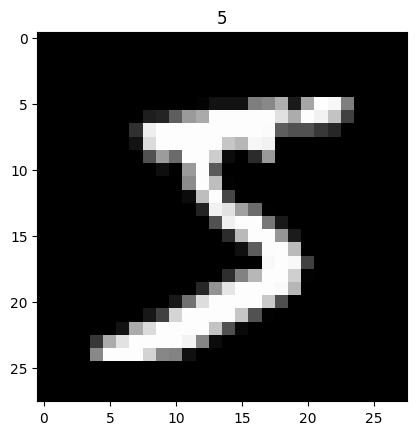

훈련용 데이터의 형태: (60000, 784) 테스트용 데이터의 형태: (10000, 784)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()      #MNIST 읽어 들이기
print(x_train.shape, x_test.shape)      #28*28의 손으로 쓴 문자 이미지가 6만장

#각 픽셀의 값을 0-1 범위에 넣는다
x_train = x_train / 255
x_test = x_test / 255

#손으로 쓴 문자 이미지를 1개 표시
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.title(t_train[0])
plt.show()

#1차원으로 변환한다
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print("훈련용 데이터의 형태:", x_train.shape, "테스트용 데이터의 형태:", x_test.shape) 

In [4]:
epochs = 20
batch_size = 128
n_in_out = 784               #입출력층의 뉴런 수
n_mid = 64                   #중간층의 뉴런 수

In [6]:
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense

#각 층
x = Input(shape=(n_in_out,))     #입력
encoder = Dense(n_mid, activation="relu")       #Encoder
decoder = Dense(n_in_out, activation="sigmoid") #D ecoder

#망
h = encoder(x)
y = decoder(h)

#오토인코더의 모델
model_autoencoder = Model(x, y)
model_autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
model_autoencoder.summary()
print()

#Encoder만의 모델
model_encoder = Model(x, h)
model_encoder.summary()
print()

#Decoder만의 모델
input_decoder = Input(shape=(n_mid,))
model_decoder = Model(input_decoder, decoder(input_decoder))
model_decoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
Total params: 50,240
Trainable params

In [7]:
model_autoencoder.fit(x_train, x_train,
                      shuffle=True,
                      epochs=epochs,
                      batch_size=batch_size,
                      validation_data=(x_test, x_test))

Epoch 1/20
469/469 [==============================] - 6s 8ms/step - loss: 0.1985 - val_loss: 0.1325
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1163 - val_loss: 0.1014
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0951 - val_loss: 0.0880
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0854 - val_loss: 0.0813
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0804 - val_loss: 0.0780
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0778 - val_loss: 0.0761
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0764 - val_loss: 0.0751
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0755 - val_loss: 0.0744
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0749 - val_loss: 0.0740
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0745 - val_loss: 0.0737

In [ ]:
encoded = model_encoder.predict(x_test)
decoded = model_decoder.predict(encoded)

n = 8     #표시할 이미지 수
plt.figure(figsize=(16, 4))
for i in range(n):
    #입력 이미지
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="Greys_r")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #중간층의 출력
    ax = 